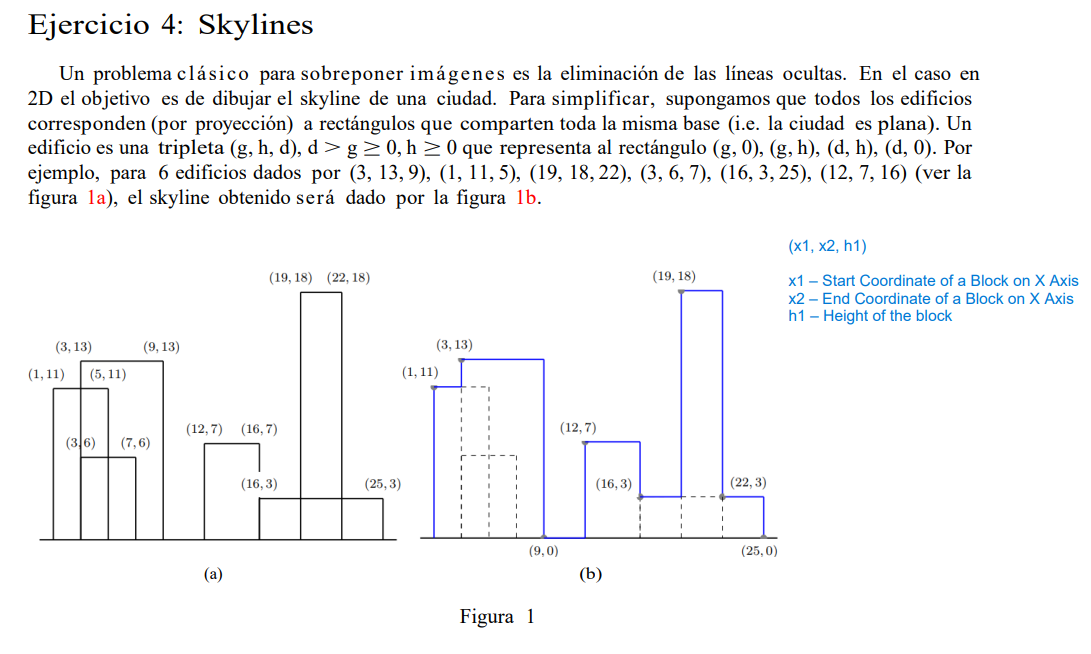

### Considerar:

### (x1, x2, h1)

### x1 – Start Coordinate of a Block on X Axis
### x2 – End Coordinate of a Block on X Axis
### h1 – Height of the block

In [1]:
rects = [(3, 13, 9), (1, 11, 5), (19, 18, 22), (3, 6, 7), (16, 3, 25), (12, 7, 16)]

In [2]:
def toRect(rect):
  g, h, d = rect
  return [(g, 0),(g, h),(d, h),(d, 0)]

In [3]:
r0 = toRect(rects[0])
r0

[(3, 0), (3, 13), (9, 13), (9, 0)]

In [7]:
import matplotlib.pyplot as plt

print("r0       = ", r0)
print("*r0      = ", *r0) # * crea lista con elementos repetidos
print("zip(*r0) = ", list(zip(*r0)))  #La función zip() toma iterables (pueden ser cero o más), los agrega en una tupla y lo devuelve.


r0       =  [(3, 0), (3, 13), (9, 13), (9, 0)]
*r0      =  (3, 0) (3, 13) (9, 13) (9, 0)
zip(*r0) =  [(3, 3, 9, 9), (0, 13, 13, 0)]


In [18]:
x, y = zip(*r0)
print("x = ", x)
print("y = ", y)

x =  (3, 3, 9, 9)
y =  (0, 13, 13, 0)


### The **plot**() function is used to draw points (markers) in a diagram.

### By default, the plot() function draws a line from point to point.

### The function takes parameters for specifying points in the diagram.

### **Parameter 1** is an array containing the points on the **x-axis**.

### **Parameter 2** is an array containing the points on the **y-axis**.

##### Ejm;
##### x =  (3,  3,  9,  9)
##### y =  (0, 13, 13,  0)
##### => plot() generará las coordenadas (3,0) (3,13) (9,13) (9,0)
##### las cuales se graficarán como líneas que unen esos puntos. 

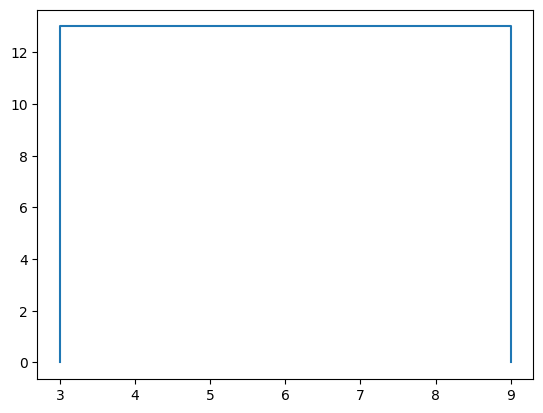

In [20]:
plt.plot(x, y)

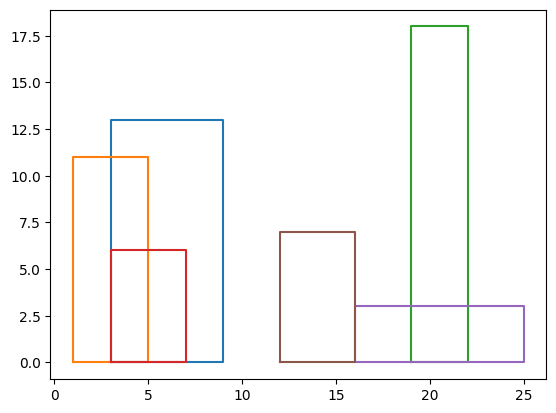

In [22]:
for ri in rects:
  rect = toRect(ri)
  rect.append(rect[0])
  x, y = zip(*rect)
  plt.plot(x, y)
plt.show()

In [23]:
def toContour(rect):
  g, h, d = rect
  return [(g, h), (d, 0)]

In [24]:
r0

[(3, 0), (3, 13), (9, 13), (9, 0)]

In [25]:
c0 = toContour(rects[0])
c0

[(3, 13), (9, 0)]

In [26]:
def drawRect(rect):
  r0 = rect + [rect[0]]
  x, y = zip(*r0)
  plt.plot(x, y, "--")

In [27]:
def drawContour(contour):
  points = [(0, 0)]
  for x, y in contour:
    points.append((x, points[-1][1]))
    points.append((x, y))

  x, y = zip(*points)
  plt.plot(x, y, lw=3)

In [29]:
r0 = toRect(rects[0])
c0 = toContour(rects[0])
r1 = toRect(rects[1])
c1 = toContour(rects[1])

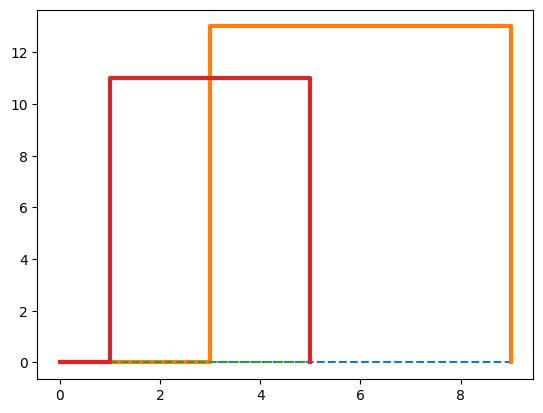

In [30]:
drawRect(r0)
drawContour(c0)
drawRect(r1)
drawContour(c1)

In [31]:
def addPoint(cf, x, y):
  if len(cf) > 1:
    if cf[-1][0] == x:
      cf[-1] = (x, max(y, cf[-1][1]))
      return
    elif cf[-1][1] == y:
      return

  cf.append((x, y))

In [32]:
def merge(c0, c1):
  cf = []
  n0, n1 = len(c0), len(c1)
  i0, i1 = 0, 0
  y0, y1 = 0, 0
  while i0 < n0 or i1 < n1:
    if i1 >= n1 or i0 < n0 and c0[i0][0] <= c1[i1][0]:
      x, y0 = c0[i0]
      i0 += 1
    else:
      x, y1 = c1[i1]
      i1 += 1
    y = max(y0, y1)
    addPoint(cf, x, y)

  return cf

[(1, 11), (3, 13), (9, 0)]


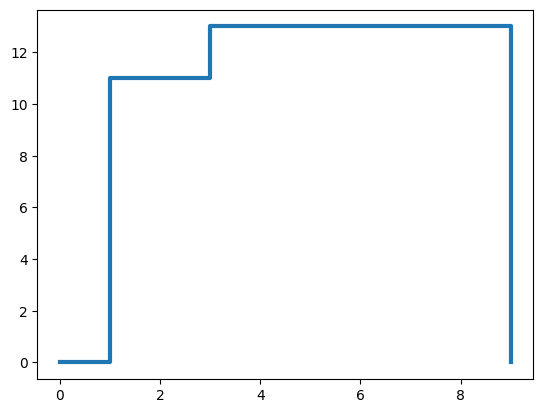

In [33]:
cf = merge(c0, c1)
print(cf)
drawContour(cf)

[(1, 11), (3, 13), (9, 0), (12, 7), (16, 3), (19, 18), (22, 3), (25, 0)]


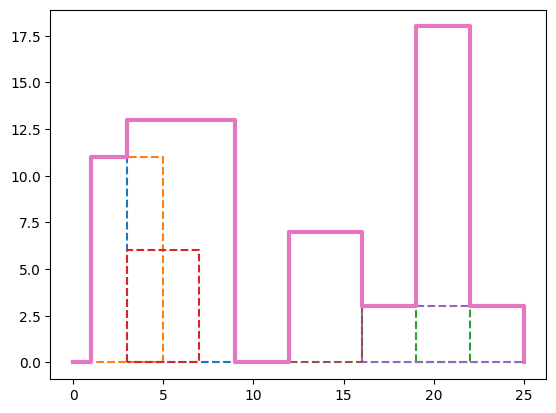

In [34]:
cf = toContour(rects[0])
drawRect(toRect(rects[0]))
for i in range(1, len(rects)):
  drawRect(toRect(rects[i]))
  cf = merge(cf, toContour(rects[i]))
print(cf)
drawContour(cf)

In [35]:
def skyline(rects, i, f):
  if i == f:
    return toContour(rects[i])
  else:
    mid = (i + f)//2
    c0 = skyline(rects, i, mid)
    c1 = skyline(rects, mid+1, f)
    return merge(c0, c1)

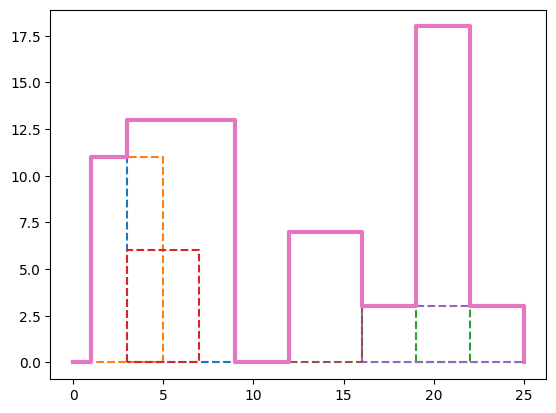

In [36]:
cf2 = skyline(rects, 0, len(rects)-1)
for rect in rects:
  drawRect(toRect(rect))
drawContour(cf2)
plt.show()